<a href="https://colab.research.google.com/github/Migaalee/machine_learning/blob/main/Assigment2_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description
## Objective
The goal of this assignment is to examine a set of bacterial cell images using machine learning techniques, including feature extraction, features selection and clustering, in order to help the biologists organize similar images. 
You will load all images, extract features, examine them and select a subset for clustering with the goal of reaching some conclusion about the best way of grouping these images.

## Dataset 
Images: bacteria; size: 50x50 pixels, with a black background and the segmented region centered in the image.

# Import all packages that will be used

In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates,radviz, scatter_matrix
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#from sklearn.preprocessing import StandardScaler -penso que nao devemos fazer standardizacao da data pq muda a sua forma

from sklearn.feature_selection import f_classif #for the anova
from sklearn.feature_selection import SelectKBest

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

from sklearn.neighbors import KNeighborsClassifier #NAO USEI AINDA
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif

#from metrics import conf,accuracy,precision,recall,F1

#Add documents below
#from tp2_aux import report_clusters,images_as_matrix

#Only for google collabs
from google.colab import files #this is to load files from your local disk

# Upload data

Auxiliary document upload

In [2]:
TP2_aux = files.upload() 

Saving tp2_aux.py to tp2_aux.py


Data set

In [3]:
data = files.upload()

Saving images.zip to images.zip


In [4]:
import zipfile
import io
images = zipfile.ZipFile(io.BytesIO(data['images.zip']), "r")
images.extractall()

Import labels

In [5]:
y = files.upload()

Saving labels.txt to labels.txt


# Data preparation

Use the images_as_matrix function to return a 2D numpy array with one image per row (563 rows) and one pixel per column (50x50=2500 columns) from the images in the images folder.

In [6]:
from tp2_aux import images_as_matrix
X = images_as_matrix(N=563)

#Features Extraction

With each method, extract six features from the data set, for a total of 18 features.

###Principal Component Analysis (PCA)
This is a method of dimensionality reduction that computes new features maximizing the preserved variance of the original data set. It transforms the data into an orthogonal set of coordinates so that the values along each coordinate are not correlated. 

In this case, we should not standardize or normalize the data because doing so will distort its shape.


In [7]:
pca = PCA(n_components = 6) #number of features we want to extract that correspond to the principal components
X_pca = pca.fit_transform(X) #create a new matrix X, X_pca, with the new six features 
#intrepretation: prints the first 6 PC for each image

In [8]:
#Dataframe with the values of the first 6 PCA for all examples 
df_pca = pd.DataFrame(X_pca, columns = ['pca1','pca2','pca3','pca4','pca5','pca6'])
print(df_pca) 

            pca1        pca2         pca3        pca4        pca5         pca6
0   -1566.769060  256.972337   134.894364    0.425208  -78.219198    42.333352
1   -1096.790534 -259.430895   281.108142  140.740915  486.231125   337.659370
2   -1899.446655  -88.053971   188.662028   18.246523   11.080490  -351.756228
3   -1102.846546 -258.014858  -215.959222 -175.719591 -118.139082   -17.893588
4   -1713.854832 -441.738626   -58.189256  111.578309   86.092546   105.252692
..           ...         ...          ...         ...         ...          ...
558   766.613222 -693.642374  1191.752013   43.696428  195.631255  -181.280955
559 -1446.305757  440.791998   555.953480  349.496895 -388.072796  1224.650278
560 -1607.762033 -339.039526   471.903450  266.075340   42.667614   243.060169
561   200.021657 -567.829973   950.199758  125.973008 -700.379139  -788.107848
562  -320.936427  914.236160   623.763268  320.711009  536.389024  -289.588068

[563 rows x 6 columns]


###t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [9]:
tsne = TSNE(n_components = 6, method = 'exact') #method = ’barnes_hut’ is the default. method = 'exact' runs a slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. However, the exact method cannot scale to millions of examples.
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [10]:
#Dataframe
df_tsne = pd.DataFrame(X_tsne,columns = ['tsne1','tsne2','tsne3','tsne4','tsne5','tsne6'])
print(df_tsne)


         tsne1      tsne2       tsne3      tsne4      tsne5      tsne6
0   -22.123669  -7.523289  112.893478 -33.810749  79.094429 -43.348598
1     8.590239  -2.837514   21.074429   7.780875 -10.220387  -1.464918
2    21.174490  -3.150915   -4.682674  11.233221   1.014544 -10.661259
3     1.202043  -9.395641   18.051624  -3.064868   9.723572  -6.642215
4    20.108747  -3.355578    9.654712  -0.526560  -1.585870  -2.341228
..         ...        ...         ...        ...        ...        ...
558  -6.814653  -4.059627   -6.341681 -18.004782 -13.551891  -0.368724
559   7.855708   1.117169    9.577238  -5.162953  -3.910253 -20.433830
560  26.702772   3.156291    6.506842   0.478717  -4.261222 -11.171874
561 -13.352359  -7.673076    8.633200  -2.066080 -13.096975  -4.968789
562  -2.806542 -13.933256   -3.882554 -13.591160   1.823316 -15.519993

[563 rows x 6 columns]


###Isometric mapping with Isomap

In [11]:
isomap = Isomap(n_components = 6, n_neighbors=5) #5 é o numero de neighbours por default
X_isomap = isomap.fit_transform(X)

In [12]:
#Dataframe
df_isomap = pd.DataFrame(X_isomap,columns = ['im1','im2','im3','im4','im5','im6'])
print(df_isomap)

             im1          im2  ...         im5          im6
0   -3542.154360   985.098659  ...   15.216278  1308.514337
1   -3150.522163  -585.940269  ...  655.008573   813.251967
2   -4943.865828    85.856124  ... -407.711430  1107.826303
3   -2305.977768  -639.373716  ... -606.680737    76.015657
4   -3927.758208  -839.460439  ...  613.825335   994.550631
..           ...          ...  ...         ...          ...
558  2725.343066   720.793744  ...  961.556475  -839.706573
559 -4475.871424  1152.987403  ...  371.217944   588.210993
560 -4567.669782    36.818054  ...  423.216752  1478.428098
561  3365.305026  -210.677432  ... -544.573532  -313.341049
562  -896.830004  3109.392351  ...  782.954261   634.254161

[563 rows x 6 columns]


##After extracting features, select the best for clustering.

In [13]:
#Transform the labels document into a pandas dataframe 

labels = np.loadtxt('labels.txt', delimiter=',')
y = labels[:,1].reshape(-1,1)
y = pd.DataFrame(y, columns = ['y'])

print(y)
#y.iloc[105] #test that will concatenate well later

       y
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
558  0.0
559  0.0
560  0.0
561  0.0
562  0.0

[563 rows x 1 columns]


In [14]:
#Create a dataframe with the 18 features and the y values
df_total = pd.concat((df_pca, df_tsne, df_isomap, y), axis=1)
print(df_total) 

            pca1        pca2         pca3  ...         im5          im6    y
0   -1566.769060  256.972337   134.894364  ...   15.216278  1308.514337  0.0
1   -1096.790534 -259.430895   281.108142  ...  655.008573   813.251967  0.0
2   -1899.446655  -88.053971   188.662028  ... -407.711430  1107.826303  0.0
3   -1102.846546 -258.014858  -215.959222  ... -606.680737    76.015657  0.0
4   -1713.854832 -441.738626   -58.189256  ...  613.825335   994.550631  0.0
..           ...         ...          ...  ...         ...          ...  ...
558   766.613222 -693.642374  1191.752013  ...  961.556475  -839.706573  0.0
559 -1446.305757  440.791998   555.953480  ...  371.217944   588.210993  0.0
560 -1607.762033 -339.039526   471.903450  ...  423.216752  1478.428098  0.0
561   200.021657 -567.829973   950.199758  ... -544.573532  -313.341049  0.0
562  -320.936427  914.236160   623.763268  ...  782.954261   634.254161  0.0

[563 rows x 19 columns]


In [22]:
#Select only the rows when y != 0
df_evaluated = df_total[df_total['y'] > 0]
df_evaluated.pop("y")
#print(df_evaluated)
#with pd.option_context('display.max_columns', None):  # more options can be specified also
#    print(df_evaluated)


#Create y dataframe only when y != 0
y_evaluated = y[y['y'] > 0]
#print(y_evaluated)
#print(len(y_evaluated))

            pca1        pca2  ...          im5          im6
25  -1007.021989 -876.523109  ... -1378.728959  -347.821222
87   -262.402063  282.057743  ... -1177.406395  -666.221777
98   -739.410824 -473.283368  ...   764.380039  -995.161705
105  -331.781583  142.332327  ...  -425.202603   261.101615
106  -325.975269 -995.149488  ...  -751.416200 -1595.292817
..           ...         ...  ...          ...          ...
536  1345.042235 -277.597473  ...  1234.409313 -1050.394546
538  1138.372606 -624.778405  ...  3834.150524 -1186.939050
544  1436.337613   11.491711  ...  4682.447190 -1777.386303
554  1455.684831  713.092487  ...  -741.036332   565.616736
556   956.572423  383.429459  ...  4982.070445 -1401.360697

[81 rows x 18 columns]


### Choose features to maintain

In [51]:
#Evaluate the most usefull features with ANOVA
f, prob = f_classif(df_evaluated,y_evaluated) 
print(f) # check highest value here
print(prob) #check smallest value here

#maybe 2, 14, 13, 3, 1

[7.84258393e+00 4.66338816e+01 1.91877840e+01 3.39142653e-01
 2.81642143e-01 1.26269975e+00 7.24724199e-01 1.40478378e+00
 3.96092856e+00 4.75523492e-03 5.37631665e-01 6.76287063e+00
 2.19950442e+01 4.21774934e+01 2.72446618e+00 2.36041578e+00
 7.83034618e-01 7.53186913e-01]
[7.88001007e-04 4.76804240e-14 1.67139378e-07 7.13426002e-01
 7.55307702e-01 2.88607004e-01 4.87691221e-01 2.51559649e-01
 2.29957165e-02 9.95256342e-01 5.86278918e-01 1.95660232e-03
 2.66092234e-08 3.83292069e-13 7.18255400e-02 1.01090125e-01
 4.60575969e-01 4.74256833e-01]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
#Evaluate the most usefull features with Select K Best - Lecture 15
selector = SelectKBest(f_classif, k=5)
X_final = selector.fit_transform(df_evaluated, y_evaluated)

#print(X_final)

#Dataframe
#df_X_final = pd.DataFrame(X_final,columns = ['ft1','ft2','ft3', 'ft4', 'ft5'])

#print(df_X_final)

cols = selector.get_support(indices=True)
features_df_new = df_evaluated.iloc[:,cols]

features_df_new

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,pca1,pca2,pca3,im1,im2
25,-1007.021989,-876.523109,-459.409490,-1909.045836,-1467.993748
87,-262.402063,282.057743,-1283.710929,-769.569393,-1750.049802
98,-739.410824,-473.283368,-515.608773,-1523.531888,-1807.478902
105,-331.781583,142.332327,-835.238111,-1505.950785,-832.815079
106,-325.975269,-995.149488,-595.658688,-25.219991,-2453.627865
...,...,...,...,...,...
536,1345.042235,-277.597473,907.638509,3528.325142,1789.316091
538,1138.372606,-624.778405,1109.604140,3513.514033,1128.573788
544,1436.337613,11.491711,849.700344,3925.080065,1743.520992
554,1455.684831,713.092487,1394.046127,3814.904133,4498.864941


In [54]:
for i in range(len(selector.scores_)):
	print('Feature %d: %f' % (i, selector.scores_[i]))

Feature 0: 7.842584
Feature 1: 46.633882
Feature 2: 19.187784
Feature 3: 0.339143
Feature 4: 0.281642
Feature 5: 1.262700
Feature 6: 0.724724
Feature 7: 1.404784
Feature 8: 3.960929
Feature 9: 0.004755
Feature 10: 0.537632
Feature 11: 6.762871
Feature 12: 21.995044
Feature 13: 42.177493
Feature 14: 2.724466
Feature 15: 2.360416
Feature 16: 0.783035
Feature 17: 0.753187


### Plot the scores from SelectKbest

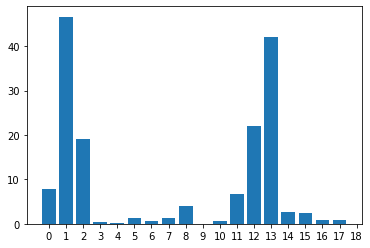

In [58]:

from matplotlib import pyplot
plt.xticks(range(0, 19))
pyplot.bar([i for i in range(len(selector.scores_))], selector.scores_)
pyplot.show()

Scatter matrix


In [18]:
#scatter_matrix(df_evaluated, alpha=0.5, figsize=(10,7), diagonal='kde')

### Check which features correlate with each other

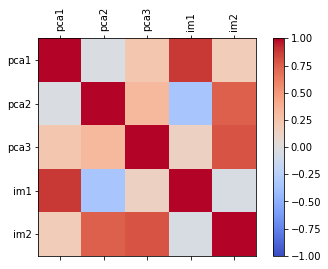

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = features_df_new
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

#Here we can see that pca1 and im1 is very correlated, so we should choose one of them. Pca1 had a lower score in Kbest and also lower F value, so im1 is a better feature.

### Mutual information criteria

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [34]:
MI = mutual_info_classif(features_df_new, y_evaluated)
print(MI) #Estimated mutual information between each feature and the target.
#we can see that some of the features have a modestly low score, such as pca1, suggesting that perhaps they can be removed. 
# We can choose 4 features: PCA2 (col1), PCA3(col2), IM1 (col12), IM2 (col13). Or 3 features: PCA2 (col1), IM1 (col12), IM2 (col13).

[0.0952472  0.41003468 0.17753745 0.34146965 0.33181999]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Clustering algorithms
For this assignment, you will parametrize and compare at least two clustering algorithms: DBSCAN and K-Means. 

In [ ]:
#HERE WE USE ALL DATA, INCLUDING THE UNLABELED!!


##DBSCAN 
(you should use a value of 5 neighbouring points as this is the default value in the Scikit-Learn implementation of DBSCAN)

In [ ]:
clustering = DBSCAN(eps=1500).fit(X_final)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0])

Find the best epsilon

[[   0.          653.04935717  797.29451696  899.47710095 1203.92719282
  1266.49278136]
 [   0.          750.5810684  1068.78330023 1184.52534122 1239.02877649
  1265.69409638]
 [   0.          390.421239    653.04935717  918.78850149  996.83512887
  1052.11674113]
 [   0.          895.32811846 1152.93596915 1184.52534122 1266.49278136
  1435.37819333]
 [   0.          376.64241573  495.80900135  775.53141331  815.20713045
   895.06887268]
 [   0.          495.80900135  631.43460212  753.29766279 1073.93112036
  1078.53723921]
 [   0.          411.61372318  489.01705851  555.85214635  815.20713045
  1052.11674113]
 [   0.         1583.25944328 2036.06357349 2148.60700306 2317.09575185
  2567.60656612]
 [   0.          376.64241573  489.01705851  605.33354428  631.43460212
   673.82772204]
 [   0.          264.25130004  555.85214635  605.33354428  775.53141331
  1106.48229872]
 [   0.          390.421239    750.5810684   895.32811846  899.47710095
  1137.62532926]
 [   0.          627.

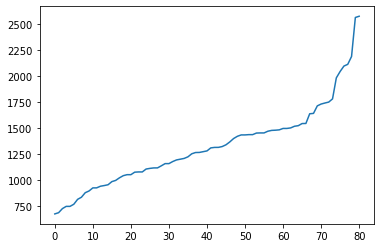

In [ ]:
#Calculate the distances of each point to its 5 (default) nearest neighbours
nn5 = NearestNeighbors(n_neighbors = 6) #we need to exclude the point itself!!!!
nn5_X = nn5.fit(X_final)
distances, indices = nn5_X.kneighbors(X_final)
print(distances) #prints distances o a point to each of its 5 nearest neighbours

#Plot this distances
distances = np.sort(distances, axis=0) #sort in ascending order
distances = distances[:,-1] #we want the distance to the fifth neighbor#
plt.plot(distances)

##K-Means

##Examine the performance
In addition, examine the performance of each algorithm (K-Means and DBSCAN) by varying the main parameter of each one (neighbourhood distance ε and number of clusters k; you can leave the other parameters with their default values)

##Select some parameter values
Finally, select some parameter values for closer examination by visually inspecting the clusters generated. For this you can use the report_clusters(ids, labels, report_file) function in the tp2_aux.py module.

Considering all the information gathered at this stage, recommend a procedure for the biologists that will help them process the segmented images, both for cell classification and to help discard segmentation errors.

##Optional exercise (2/20) - Bissecting K-Means hierarchical clustering (lecture 19)

Example of hierarchical divisive clustering. The possibility of stopping at any desired level makes this process less time-consuming, although it is a divisive cluster (usually O(2^n)). 